<a href="https://colab.research.google.com/github/Morganblabla/Estadistica/blob/main/ProyectoU2Def.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO UNIDAD II
Estadística Inferencial II

Regresión líneal múltiple y corelación

Paulina Morgan Jiménez

# Heart Prediction Dataset (Quantum)

1.- En primera instancia se sube la base de datos mediante un link vinculado a gitub.

In [22]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Morganblabla/Estadistica/refs/heads/main/Heart%20Prediction%20Quantum%20Dataset.csv")
df.dropna(inplace = True)
df

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1
...,...,...,...,...,...,...,...
495,34,0,126,292,116,9.303403,0
496,41,0,164,248,114,9.067889,0
497,45,1,159,175,75,8.718708,0
498,55,0,107,157,101,7.337650,1


# Age (Edad)

2.- Se realiza un histograma de la primera variable Age (Edad)

Nota: No tiene valores atípicos y sigue una distribución normal. Se puede usar esta variable sin problemas.



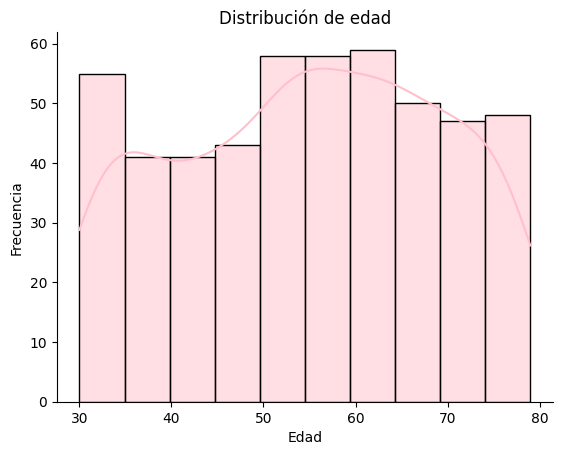

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], kde = True, color = 'pink')

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de edad')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
#No tiene valores atipicos

# Gender (Género)

3.- La variable de género es categorica, siendo 1 mujer y 0 hombre, por lo que se debe realizar ANOVA.
Resultado: El resultado de 0.79834, deriva que no hay diferencia significativa entr las variables.

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('HeartDisease~ C(Gender)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos
#No rechazamos H0

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,0.015744,0.015744,0.065348,0.79834
Residual,498.0,119.984256,0.240932,NaN,NaN


4.- Para verificar que la diferencia entre las variables
no es significante, se realiza Tukey.

Nota: Se comprobó que la diferencia entre las variables
no es significativa, ya que se puede dibujar una línea
entre las variabes y estas se tocan.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0112 0.7983 -0.0977 0.0752  False
---------------------------------------------------


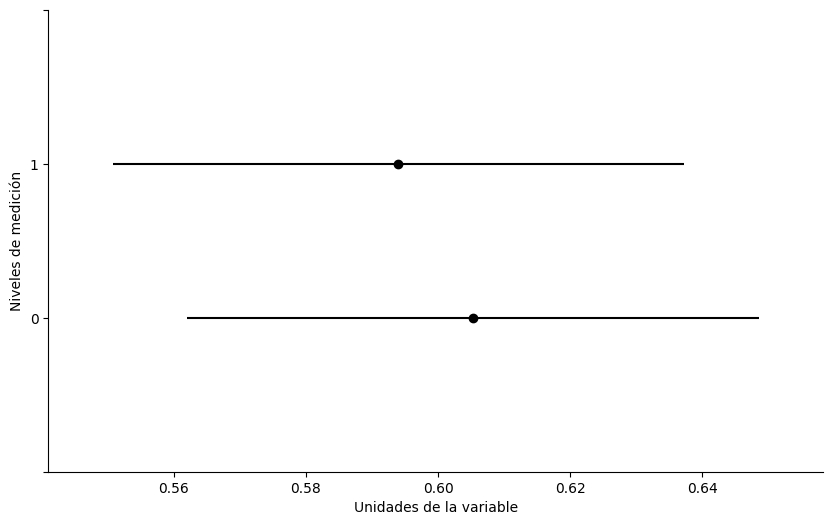

In [5]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['HeartDisease'], groups = df['Gender'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

# BloodPressure	(Presión de sangre)

5.- Se realiza un histograma de la variable BloodPressure	(Presión de sangre)

Nota: No tiene valores atípicos y sigue una distribución normal. Se puede usar esta variable sin problemas.

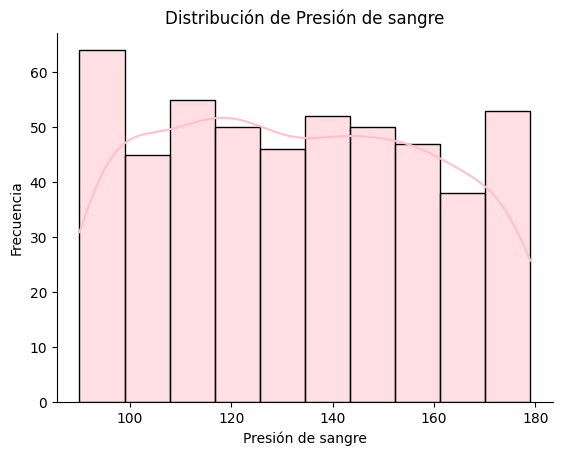

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['BloodPressure'], kde = True, color = 'pink')

plt.xlabel('Presión de sangre')
plt.ylabel('Frecuencia')
plt.title('Distribución de Presión de sangre')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
#No tiene valores atipicos

# 	Cholesterol

6.- Se realiza un histograma de la variable Cholesterol.

Nota: No tiene valores atípicos y sigue una distribución normal. Se puede usar esta variable sin problemas.

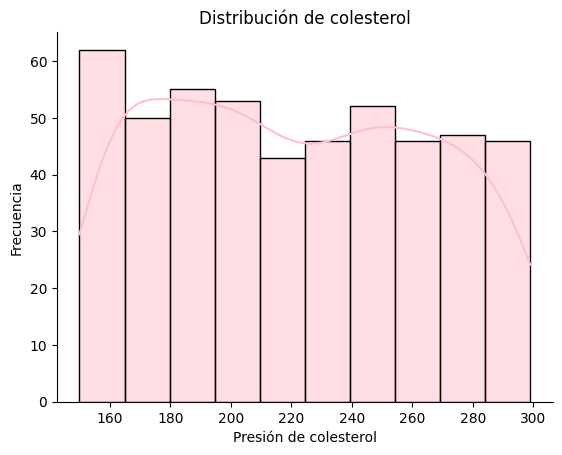

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Cholesterol'], kde = True, color = 'pink')

plt.xlabel('Presión de colesterol')
plt.ylabel('Frecuencia')
plt.title('Distribución de colesterol')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
#No tiene valores atipicos

# HeartRate

7.- Se realiza un histograma de la variable HeartRate

Nota: No tiene valores atípicos y sigue una distribución normal. Se puede usar esta variable sin problemas.

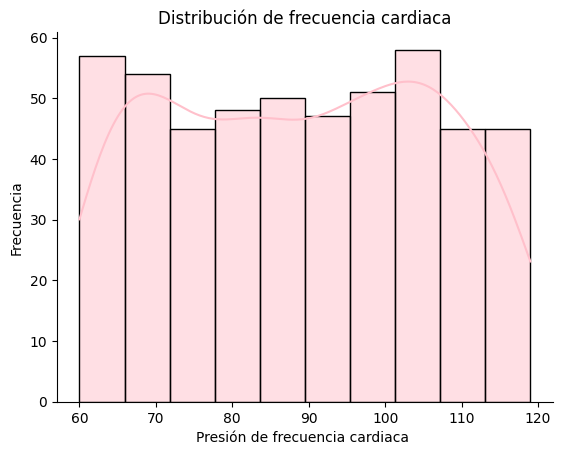

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['HeartRate'], kde = True, color = 'pink')

plt.xlabel('Presión de frecuencia cardiaca ')
plt.ylabel('Frecuencia')
plt.title('Distribución de frecuencia cardiaca')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
#No tiene valores atipicos

# QuantumPatternFeature

8.- Se realiza un histograma de la variable QuantumPatternFeature

Nota: No tiene valores atípicos y sigue una distribución normal. Se puede usar esta variable sin problemas.

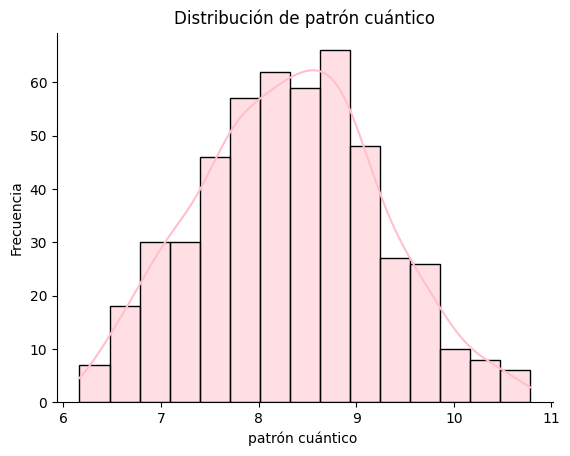

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['QuantumPatternFeature'], kde = True, color = 'pink')

plt.xlabel('patrón cuántico ')
plt.ylabel('Frecuencia')
plt.title('Distribución de patrón cuántico')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
#No tiene valores atipicos

9.- Realizamos una gráfica para verificar la linealidad de las variables con QuantumPatternFeature

Coeficiente de determinación: 0.7024


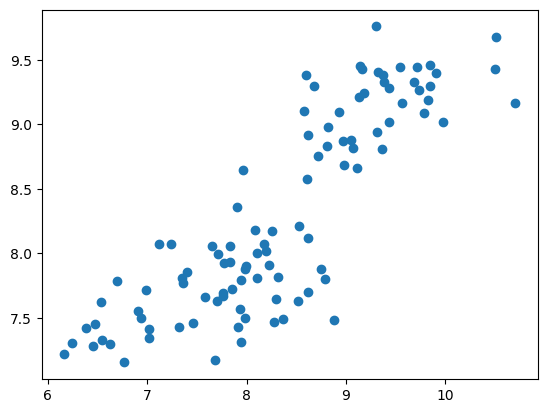

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

x = df[['BloodPressure','Gender', 'Age','HeartRate', 'Cholesterol','HeartDisease']]
Y = df['QuantumPatternFeature']

X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(y_train, X_train_constante).fit()
predicciones = modelo.predict(X_test_constante)

Yc = modelo.predict(X_test_constante)
plt.scatter(y_test, Yc)

r2 = r2_score(y_test, Yc)
print(f"Coeficiente de determinación:{r2: 0.4f}")

In [11]:
df.columns

Index(['Age', 'Gender', 'BloodPressure', 'Cholesterol', 'HeartRate',
       'QuantumPatternFeature', 'HeartDisease'],
      dtype='object')

10.- Sin embargo, la variable QuantumPatternFeature es muy díficil de conseguir para la gente común, ya que se genera mediante un algoritmo y modelos matemáticos, por lo que se decidió retirarla, aunque esto aumentaba la acertividad del modelo.

In [12]:
df.drop(columns = ["QuantumPatternFeature"], inplace = True)
df

,Age,Gender,BloodPressure,Cholesterol,HeartRate,HeartDisease
0,68,1,105,191,107,1
1,58,0,97,249,89,0
2,44,0,93,190,82,1
3,72,1,93,183,101,1
4,37,0,145,166,103,1
...,...,...,...,...,...,...
495,34,0,126,292,116,0
496,41,0,164,248,114,0
497,45,1,159,175,75,0
498,55,0,107,157,101,1


# HeartDisease

11.- Se realiza una gráfica de patel de la variable HeartDisease.

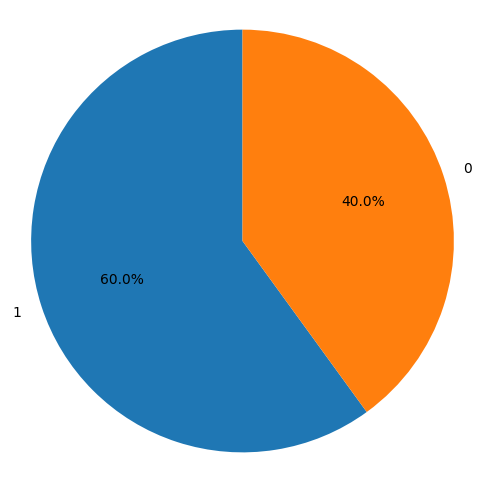

In [13]:
conteo = df['HeartDisease'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(conteo, labels=conteo.index.map(str), autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

12.- Se separa el modelo en dos grupos de entrenamiento y prueba.

In [14]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

X = df[['Age', 'Gender','BloodPressure', 'Cholesterol', 'HeartRate']]
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



13.- Para evaluar el desempeño del modelo y elegir el más efectivo, se probaron distintos algoritmos de clasificación, entre ellos Random Forest, Decision Tree, Gradient Boosting, Bagging y Extra Trees. Cada uno fue entrenado con los mismos datos y evaluado utilizando métricas como precisión, recall y f1-score. Esto permitió comparar los resultados de forma objetiva y seleccionar el modelo con mejor rendimiento general para la predicción de enfermedades cardíacas.

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

Y_pred = rf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71        40
           1       0.79      0.88      0.83        60

    accuracy                           0.79       100
   macro avg       0.79      0.77      0.77       100
weighted avg       0.79      0.79      0.79       100



In [16]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el modelo
modelo_dtc = DecisionTreeClassifier(random_state=42)
modelo_dtc.fit(X_train, y_train)

# Predecir
Y_pred = modelo_dtc.predict(X_test)

# Evaluar
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.63      0.68      0.65        40
           1       0.77      0.73      0.75        60

    accuracy                           0.71       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.71      0.71      0.71       100



In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear y entrenar el modelo
modelo_gbc = GradientBoostingClassifier(random_state=42)
modelo_gbc.fit(X_train, y_train)

# Predecir
Y_pred = modelo_gbc.predict(X_test)

# Evaluar
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        40
           1       0.84      0.87      0.85        60

    accuracy                           0.82       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.82      0.82      0.82       100



In [18]:
from sklearn.ensemble import BaggingClassifier

# Crear y entrenar el modelo
modelo_gc = BaggingClassifier(random_state=42)
modelo_gc.fit(X_train, y_train)

# Predecir
Y_pred = modelo_gc.predict(X_test)

# Evaluar
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        40
           1       0.85      0.83      0.84        60

    accuracy                           0.81       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.81      0.81      0.81       100



In [19]:
from sklearn.ensemble import ExtraTreesClassifier

# Crear y entrenar el modelo
modelo_etc = ExtraTreesClassifier(random_state=42)
modelo_etc.fit(X_train, y_train)

# Predecir
Y_pred = modelo_etc.predict(X_test)

# Evaluar
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78        40
           1       0.83      0.92      0.87        60

    accuracy                           0.84       100
   macro avg       0.84      0.82      0.83       100
weighted avg       0.84      0.84      0.84       100



Nota: El mejor fue el modelo.etc (ExtraTreesClassifier) nos demuestra la precisión del modelo, siendo esta...

1.   **Accuracy general: 84% →**El modelo acierta en 84 de cada 100 casos, lo cual es aceptable para un problema médico, aunque en contextos clínicos suele buscarse mayor sensibilidad (recall).
2.   **Clase 1 (enfermedad presente):**

**Recall: 0.92** → El modelo identifica correctamente el 92% de los casos con enfermedad. Esto es excelente, ya que indica que muy pocos pacientes enfermos son pasados por alto (bajo falso negativo).

**Precisión: 0.83** → De todos los que el modelo predijo como enfermos, el 85% sí lo están. Hay algunos falsos positivos, pero sigue siendo alto.

**F1-score: 0.87** → Buen balance entre precisión y recall. Es una clase que el modelo detecta bien.

3.  **Clase 0 (sin enfermedad):**

**Recall: 0.72** → Aquí el modelo falla más: solo detecta correctamente el 68% de los sanos. Esto indica que hay falsos positivos (personas sanas clasificadas como enfermas). Esto podría deberse a que el modelo está más inclinado a detectar enfermedad (clase 1), lo cual no es malo si el objetivo es no dejar pasar casos enfermos.

14.- Se pone a prueba el modelo.

Edad = 20

Presión arterial = 100 → dentro de lo normal.

Colesterol = 200 → al límite de lo aceptable.

Frecuencia cardíaca = 100 → en reposo, esto ya se considera taquicardia leve.

Género = 1 (Hombre)

In [20]:
modelo_etc.predict([[20, 1, 100, 200, 100]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


array([1])

El resultado del modelo fue: 1, es decir, predice que esta persona tiene enfermedad cardíaca.

El modelo ha aprendido de los datos que cierta combinación de valores en hombres jóvenes con ese rango de colesterol y frecuencia cardíaca puede asociarse a enfermedad.